# Data analysis for the Experiment 3

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit as cf

### Importing data

data_1 : inclination 30$^{\circ}$, 54.2g

data_2 : inclination 30$^{\circ}$, 31.3g

data_3 : inclination 40$^{\circ}$, 54.2g

data_4 : inclination 40$^{\circ}$, 31.3g

data_5 : inclination 30$^{\circ}$, 31.3g, 3 & 4 cm from the scale bar

data_6 : inclination 30$^{\circ}$, 31.3g, 5 & 6 cm from the scale bar (measured twice)

data_7 : inclination 30$^{\circ}$, 54.2g, 5 & 6 cm from the scale bar

data_8 : inclination 30$^{\circ}$, 54.2g, 7 & 8 cm from the scale bar (measured twice)

In [2]:
data_1 = pd.read_csv('data_01.csv', sep=',')
data_2 = pd.read_csv('data_02.csv', sep=',')
data_3 = pd.read_csv('data_03.csv', sep=',')
data_4 = pd.read_csv('data_04.csv', sep=',')
data_5 = pd.read_csv('data_05.csv', sep=',')
data_6 = pd.read_csv('data_06.csv', sep=',')
data_7 = pd.read_csv('data_07.csv', sep=',')
data_8 = pd.read_csv('data_08.csv', sep=',')

exp11 = (data_1[["t1","x1","y1"]].dropna(how="any")).values
exp12 = (data_1[["t2","x2","y2"]].dropna(how="any")).values
exp13 = (data_1[["t3","x3","y3"]].dropna(how="any")).values

exp21 = (data_2[["t1","x1","y1"]].dropna(how="any")).values
exp22 = (data_2[["t2","x2","y2"]].dropna(how="any")).values
exp23 = (data_2[["t3","x3","y3"]].dropna(how="any")).values

exp31 = (data_3[["t1","x1","y1"]].dropna(how="any")).values
exp32 = (data_3[["t2","x2","y2"]].dropna(how="any")).values
exp33 = (data_3[["t3","x3","y3"]].dropna(how="any")).values

exp41 = (data_4[["t1","x1","y1"]].dropna(how="any")).values
exp42 = (data_4[["t2","x2","y2"]].dropna(how="any")).values
exp43 = (data_4[["t3","x3","y3"]].dropna(how="any")).values

exp51 = (data_5[["t1","x1","y1"]].dropna(how="any")).values
exp52 = (data_5[["t2","x2","y2"]].dropna(how="any")).values

exp61 = (data_6[["t1","x1","y1"]].dropna(how="any")).values
exp62 = (data_6[["t2","x2","y2"]].dropna(how="any")).values
exp63 = (data_6[["t3","x3","y3"]].dropna(how="any")).values
exp64 = (data_6[["t4","x4","y4"]].dropna(how="any")).values

exp71 = (data_7[["t1","x1","y1"]].dropna(how="any")).values
exp72 = (data_7[["t2","x2","y2"]].dropna(how="any")).values

exp81 = (data_8[["t1","x1","y1"]].dropna(how="any")).values
exp82 = (data_8[["t2","x2","y2"]].dropna(how="any")).values
exp83 = (data_8[["t3","x3","y3"]].dropna(how="any")).values
exp84 = (data_8[["t4","x4","y4"]].dropna(how="any")).values

### Rotating data

We need rotate the data for 90$^{\circ}$, clockwise(for convenience).

In [3]:
def swap(a):
    a[:,1], a[:,2] = a[:,2], -a[:,1]

swap(exp11)
swap(exp12)
swap(exp13)
swap(exp21)
swap(exp22)
swap(exp23)
swap(exp31)
swap(exp32)
swap(exp33)
swap(exp41)
swap(exp42)
swap(exp43)

swap(exp51)
swap(exp52)
swap(exp61)
swap(exp62)
swap(exp63)
swap(exp64)
swap(exp71)
swap(exp72)
swap(exp81)
swap(exp82)
swap(exp83)
swap(exp84)

## Data preparation for experiment 1

### Make truncated dataset.

Cut off the data in the circular rail.

In [4]:
def cutoff(expt,n):
    for i in range(0,len(expt)):
        if ((expt[i,2] - expt[i+1,2]) < 0):
            break
    for j in range(i,len(expt)):
        expt[j,0] = 0
        expt[j,1] = 0
        expt[j,2] = 0
    globals()['exp{0:d}tr'.format(n)] = np.array([expt[0,0],expt[0,1],expt[0,2]])
    for j in range(1,i):
        globals()['exp{0:d}tr'.format(n)] = np.append(globals()['exp{0:d}tr'.format(n)], expt[j,:]).reshape(j+1,3)

cutoff(exp11,11)
cutoff(exp12,12)
cutoff(exp13,13)
cutoff(exp21,21)
cutoff(exp22,22)
cutoff(exp23,23)
cutoff(exp31,31)
cutoff(exp32,32)
cutoff(exp33,33)
cutoff(exp41,41)
cutoff(exp42,42)
cutoff(exp43,43)

Let me plot KE and PE of the ball. Let's just do this for the first experiment, exp11. For the exp11, inclination is 30$^{\circ}$ and $m=54.2$g. Potential energy is easy to calculate. We need to extract velocity information from the $x$, $y$, and $t$ data. The raw $v$ data is messy, so we will perform linear fit.

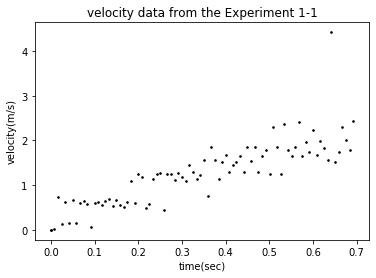

In [5]:
m = 54.2e-3
k = 1.326

E_tot = np.append([m * 9.8 * exp11tr[0,2] for _ in range(0,len(exp11tr))], np.array([0]))
E_pot = np.append(m * 9.8 * exp11tr[:,2], np.array([0]))

v = np.zeros(len(exp11tr)-1)

t = exp11tr[:,0]
x = exp11tr[:,1]
y = exp11tr[:,2]

xt = np.append(np.array([0]),x)
x = np.append(x,np.array([0]))
yt = np.append(np.array([0]),y)
y = np.append(y,np.array([0]))
tt = np.append(np.array([0]),t)
t = np.append(t,np.array([0]))

timestep = t - tt + 1e-6
xstep = x - xt
ystep = y - yt
xstep[len(exp11tr)] = 0.0
ystep[len(exp11tr)] = 0.0
v = np.sqrt((xstep / timestep) ** 2 + (ystep / timestep) ** 2)
v[0]=0.0

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(t, v, marker='.', color='black', s = 10)
plt.xlabel('time(sec)')
plt.ylabel('velocity(m/s)')
plt.title('velocity data from the Experiment 1-1')
plt.show()

If we plot the linear fit within the data, it looks like the following graph.

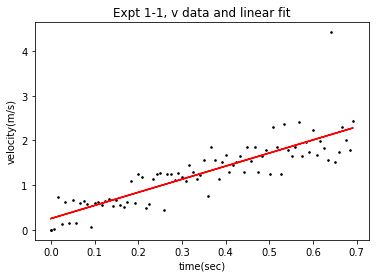

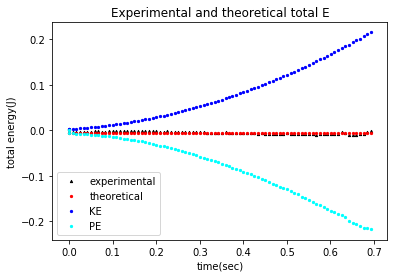

-0.0006610172696810447


In [6]:
def func1(x,a,b):
    return a*x+b

popt, pcov = cf(func1, t, v)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(t, v, marker='.', color='black', s = 10)

plt.plot(t, popt[0]*t+popt[1],'r-')
plt.xlabel('time(sec)')
plt.ylabel('velocity(m/s)')
plt.title('Expt 1-1, v data and linear fit')
plt.show()

v_fit = popt[0]*t+popt[1]
E_kin = 0.5 * m * v_fit ** 2 + 0.2 * m * v_fit ** 2 * k
#E_kin = 0.5 * m * v ** 2 + 0.2 * m * v ** 2 * k
E_exp_tot = E_pot + E_kin

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(t, E_exp_tot, marker='^', color='black', s = 5, label='experimental')
ax.scatter(t, E_tot, marker='o', color='red', s = 5, label='theoretical')
ax.scatter(t, E_kin, marker='o', color='blue', s = 5, label='KE')
ax.scatter(t, E_pot, marker='o', color='cyan', s = 5, label='PE')
plt.xlabel('time(sec)')
plt.ylabel('total energy(J)')
plt.legend(loc='lower left')
plt.title('Experimental and theoretical total E')
plt.show()

error = (E_tot - E_exp_tot)
print(np.mean(error))

Let's define the function that calculates the mean error in energy.

In [13]:
error = np.zeros(12).reshape(4,3)

def CalculateError(m,k,expt,n1,n2):
    E_tot = np.append([m * 9.8 * expt[0,2] for _ in range(0,len(expt))], np.array([0]))
    E_pot = np.append(m * 9.8 * expt[:,2], np.array([0]))
    v = np.zeros(len(expt)-1)
    t = expt[:,0]
    x = expt[:,1]
    y = expt[:,2]
    xt = np.append(np.array([0]),x)
    x = np.append(x,np.array([0]))
    yt = np.append(np.array([0]),y)
    y = np.append(y,np.array([0]))
    tt = np.append(np.array([0]),t)
    t = np.append(t,np.array([0]))

    timestep = t - tt + 1e-6
    xstep = x - xt
    ystep = y - yt
    xstep[len(expt)] = 0.0
    ystep[len(expt)] = 0.0
    v = np.sqrt((xstep / timestep) ** 2 + (ystep / timestep) ** 2)
    v[0]=0.0
    
    def func1(x,a,b):
        return a*x+b

    popt, pcov = cf(func1, t, v)
    v_fit = popt[0]*t+popt[1]
    E_kin = 0.5 * m * v_fit ** 2 + 0.2 * m * v_fit ** 2 * k
    #E_kin = 0.5 * m * v ** 2 + 0.2 * m * v ** 2 * k
    E_exp_tot = E_pot + E_kin

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(t, E_exp_tot, marker='^', color='black', s = 5, label='experimental')
    ax.scatter(t, E_tot, marker='o', color='red', s = 5, label='theoretical')
    ax.scatter(t, E_kin, marker='o', color='blue', s = 5, label='KE')
    ax.scatter(t, E_pot, marker='o', color='cyan', s = 5, label='PE')
    plt.xlabel('time(sec)')
    plt.ylabel('total energy(J)')
    plt.legend(loc='lower left')
    plt.title('KE, PE, total E for expt. {}-{}'.format(n1,n2))
    plt.grid()
    plt.show()

    error[n1-1, n2-1] = np.mean(E_tot - E_exp_tot)

## For experiment 1

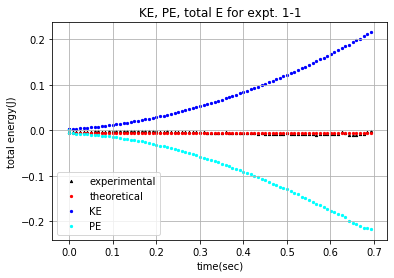

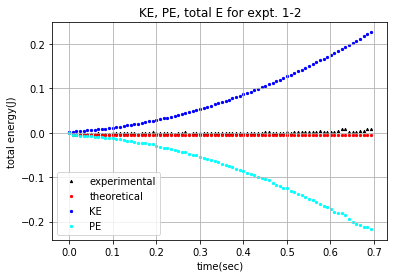

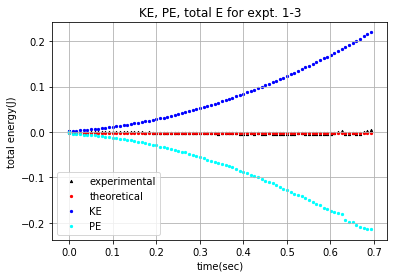

In [14]:
%matplotlib inline
CalculateError(54.2e-3, 1.326, exp11tr, 1, 1)
CalculateError(54.2e-3, 1.326, exp12tr, 1, 2)
CalculateError(54.2e-3, 1.326, exp13tr, 1, 3)

## For experiment 2

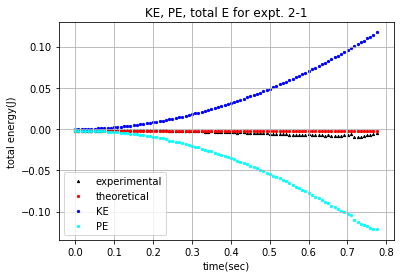

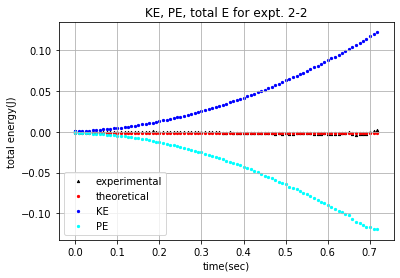

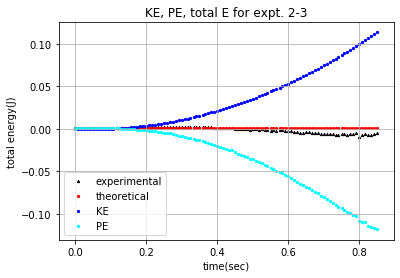

In [15]:
%matplotlib inline
CalculateError(31.3e-3, 1.478, exp21tr, 2, 1)
CalculateError(31.3e-3, 1.478, exp22tr, 2, 2)
CalculateError(31.3e-3, 1.478, exp23tr, 2, 3)

## For experiment 3

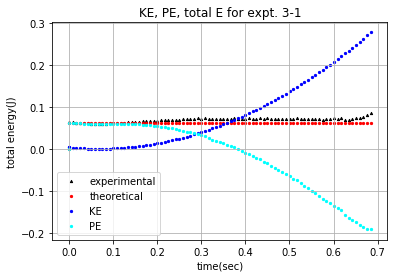

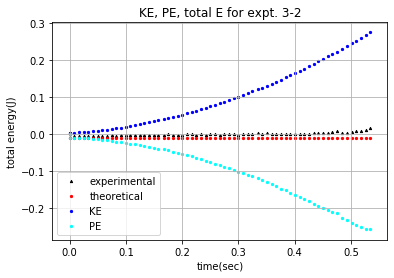

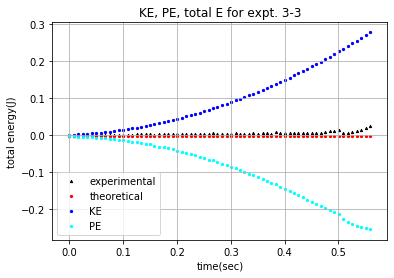

In [16]:
%matplotlib inline
CalculateError(54.2e-3, 1.326, exp31tr, 3, 1)
CalculateError(54.2e-3, 1.326, exp32tr, 3, 2)
CalculateError(54.2e-3, 1.326, exp33tr, 3, 3)

## For experiment 4

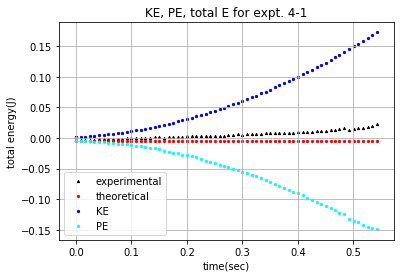

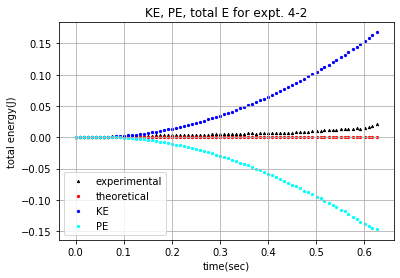

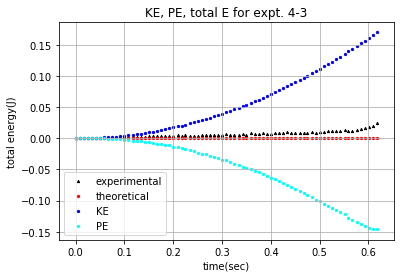

In [17]:
%matplotlib inline
CalculateError(31.3e-3, 1.478, exp41tr, 4, 1)
CalculateError(31.3e-3, 1.478, exp42tr, 4, 2)
CalculateError(31.3e-3, 1.478, exp43tr, 4, 3)

In [18]:
print(error)

[[-0.00066102 -0.00550637 -0.00095169]
 [ 0.00178907 -0.00014031  0.00165533]
 [-0.00841187 -0.00929245 -0.00797477]
 [-0.01026746 -0.00539965 -0.0065838 ]]


### Second analysis for experiment 1

Now we calcuate $\Delta t$. The function c returns the coefficient. The function Delta_t returns the numpy array dt, which contains 0) true dt, 1) calculate dt, 2) and 3) error.

In [47]:
import random

def c(k, theta):
    return 2 * np.sqrt((0.5+0.2*k)/9.8) / round(sin(np.radians(theta)),5)

def Delta_t(a,k,theta):
    h = a[0,2]
    dt = np.zeros(60).reshape(20,3)
    for i in range(0,20):
        rand = random.sample([j for j in range (0,len(a))],2)
        x1 = a[rand[0],2]
        x2 = a[rand[1],2]
        t1 = a[rand[0],0]
        t2 = a[rand[1],0]
        
        tstep = abs(t1-t2)
        x_1 = np.sqrt(h-x1)
        x_2 = np.sqrt(h-x2)
        calc_tstep = c(k,theta) * abs(x_1 - x_2)
        dt[i,0] = tstep
        dt[i,1] = calc_tstep
        dt[i,2] = (tstep-calc_tstep) / tstep * 100
    return dt

In [52]:
dt11 = Delta_t(exp11tr,1.326,30)
dt12 = Delta_t(exp12tr,1.326,30)
dt13 = Delta_t(exp13tr,1.326,30)

dt21 = Delta_t(exp21tr,1.478,30)
dt22 = Delta_t(exp22tr,1.478,30)
dt23 = Delta_t(exp23tr,1.478,30)

dt31 = Delta_t(exp31tr,1.326,40)
dt32 = Delta_t(exp32tr,1.326,40)
dt33 = Delta_t(exp33tr,1.326,40)

dt41 = Delta_t(exp41tr,1.478,40)
dt42 = Delta_t(exp42tr,1.478,40)
dt43 = Delta_t(exp43tr,1.478,40)

In [53]:
print(np.mean(dt11[:,2]))
print(np.mean(dt12[:,2]))
print(np.mean(dt13[:,2]))

print(np.mean(dt21[:,2]))
print(np.mean(dt22[:,2]))
print(np.mean(dt23[:,2]))

print(np.mean(dt31[:,2]))
print(np.mean(dt32[:,2]))
print(np.mean(dt33[:,2]))

print(np.mean(dt41[:,2]))
print(np.mean(dt42[:,2]))
print(np.mean(dt43[:,2]))

1.7915317530069568
3.17243438389808
3.3504576951536675
2.847786475202219
2.280559290225674
6.993332078060391
-2.366126466894285
-21.603727166714634
-9.829808353979189
-8.51340233446236
-4.8355071806211045
-8.661855049233582
